In [143]:
mpi2 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/output_128_mpi_n2_17768.txt'
mpi4 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/output_128_mpi_n4_17751.txt'
mpi6 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/output_128_mpi_n6_18511.txt'
mpi8 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/output_128_mpi_n8_17006.txt'
mpi16 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/output_128_mpi_n8x2_17972.txt'

mpirr2 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/output_128_mpirr_n2_17779.txt'
mpirr4 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/output_128_mpirr_n4_17753.txt'
mpirr6 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/output_128_mpirr_n6_20693.txt'
mpirr8 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/output_128_mpirr_n8_17007.txt'
mpirr16 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/mpi/output_128_mpirr_n8x2_17780.txt'


In [144]:
def parse_mpi_files(file1, file2, file3, file4, file5):
    blockSizes = {}
    with open(file1, 'r') as f:
        line1 = f.readlines()
    
    with open(file2, 'r') as f:
        line2 = f.readlines()
    
    with open(file3, 'r') as f:
        line3 = f.readlines()

    with open(file4, 'r') as f:
        line4 = f.readlines()

    with open(file5, 'r') as f:
        line5 = f.readlines()

    for i in range(0, len(line1)):
        if 'decompression' in line1[i]:
            continue
        elif 'compression' in line1[i] and 'decompression' not in line1[i]:
            t = int(line1[i].split(' ')[3])
            time1 = float(line1[i+1].split(' ')[2])
            time2 = float(line2[i+1].split(' ')[2])
            time3 = float(line3[i+1].split(' ')[2])
            time4 = float(line4[i+1].split(' ')[2])
            time5 = float(line5[i+1].split(' ')[2])
            time1 = round(time1, 1)
            time2 = round(time2, 1)
            time3 = round(time3, 1)
            time4 = round(time4, 1)
            time5 = round(time5, 1)
            blockSizes[t] = (time1, time2, time3, time4, time5)

    return blockSizes
            


In [145]:
blockSizes = parse_mpi_files(mpi2, mpi4, mpi6, mpi8, mpi16)
blockSizesrr = parse_mpi_files(mpirr2, mpirr4, mpirr6, mpirr8, mpirr16)

In [146]:
print(blockSizes)

{2: (6911.1, 4133.4, 3091.6, 2598.6, 2256.9), 4: (6986.9, 4211.6, 3253.9, 2632.5, 1981.7), 8: (6880.6, 4204.0, 3298.8, 2591.9, 1925.5), 16: (6966.1, 4055.0, 4021.1, 2628.9, 2686.5), 32: (6878.4, 4090.4, 4100.6, 4022.4, 4245.2), 64: (7006.0, 6911.5, 6977.4, 6861.4, 7224.8)}


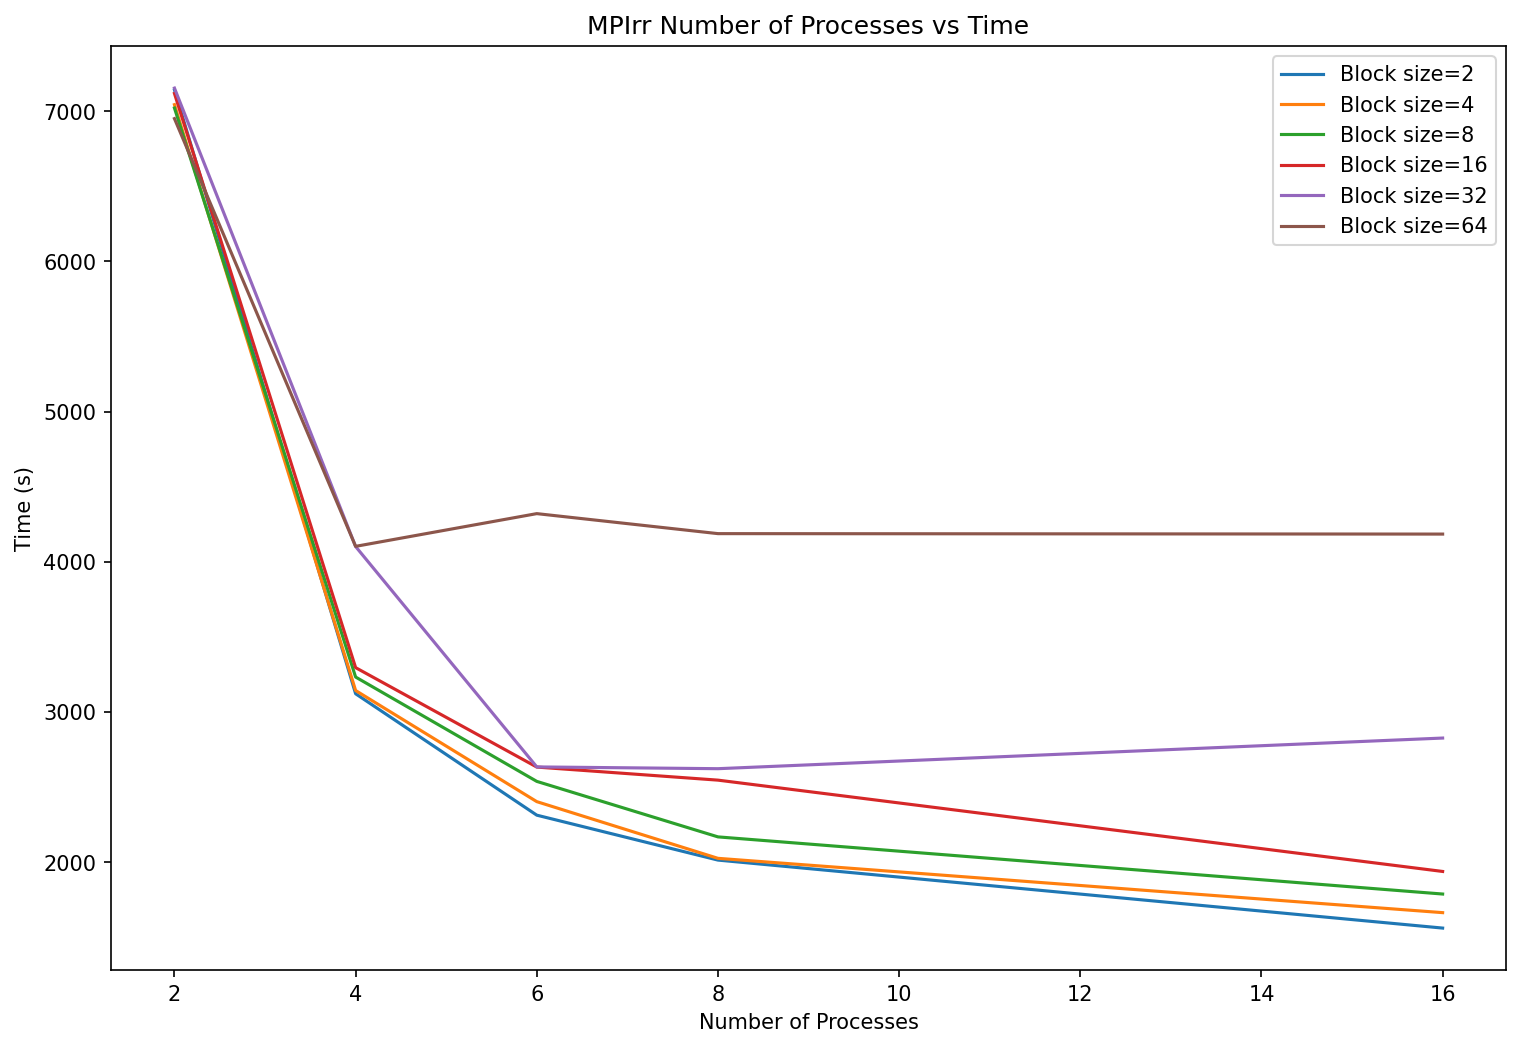

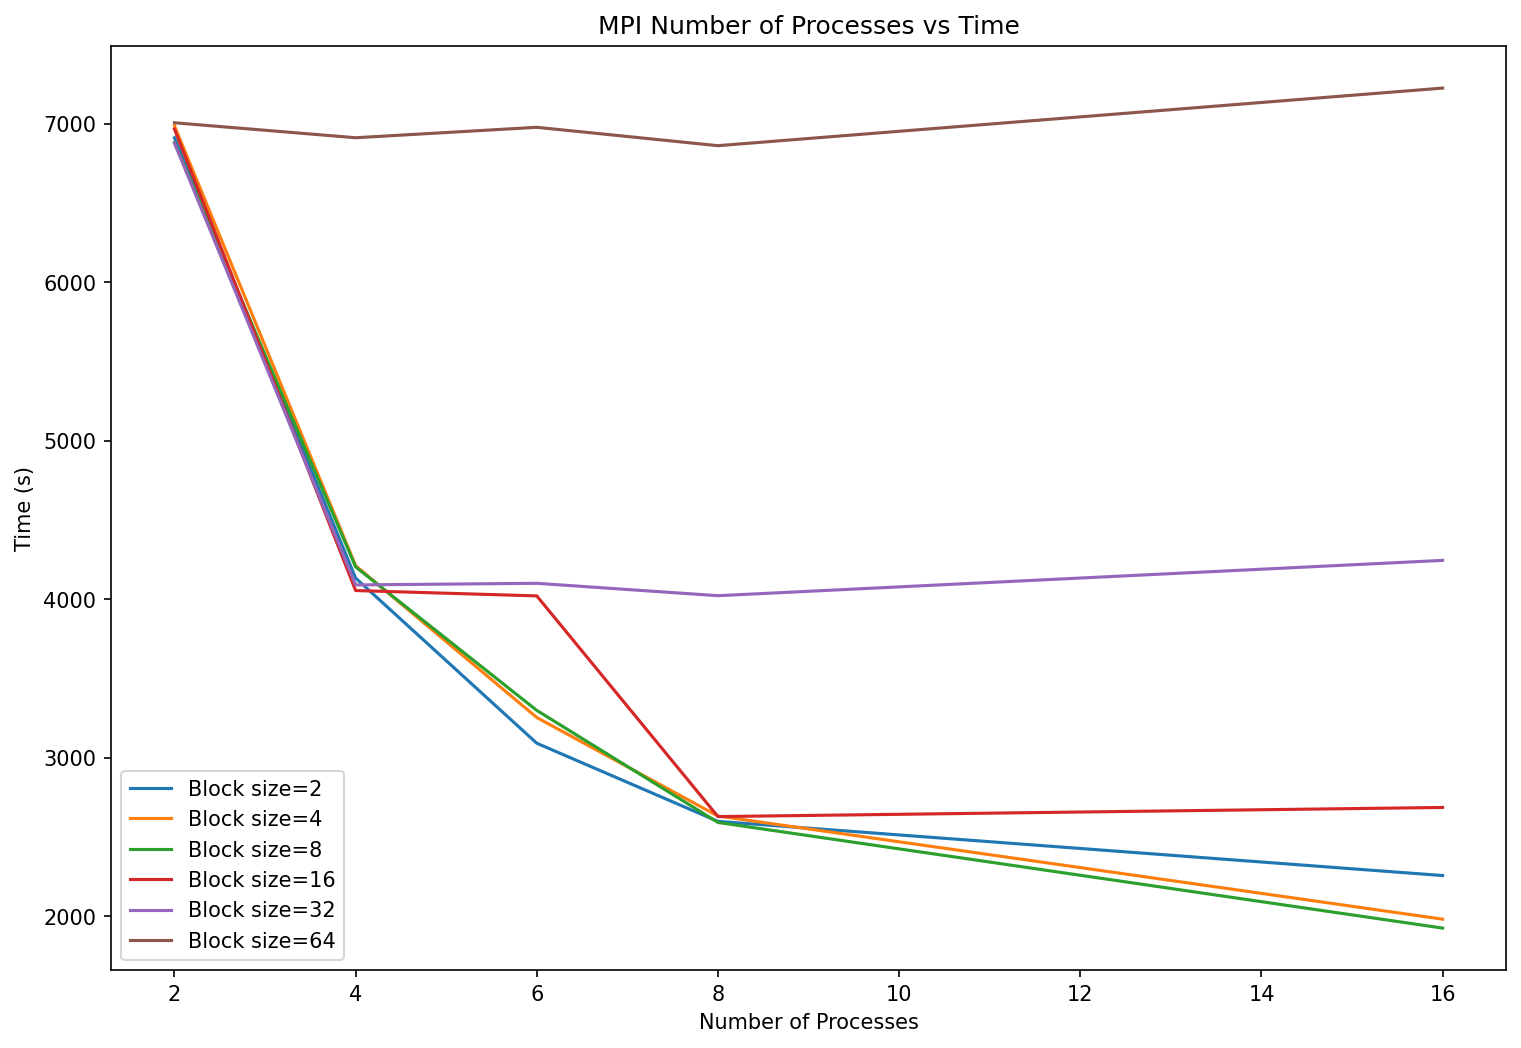

In [147]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

# Define the x-axis values for the number of processes
processes = [2, 4, 6, 8, 16]

# Iterate over blockSizes to plot each tuple
for block_size, times in blockSizesrr.items():
    ax.plot(processes, times, label=f'Block size={block_size}')

ax.set_xlabel('Number of Processes')
ax.set_ylabel('Time (s)')
ax.set_title('MPIrr Number of Processes vs Time')
ax.legend()
plt.show()

import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

# Define the x-axis values for the number of processes
processes = [2, 4, 6, 8, 16]

# Iterate over blockSizes to plot each tuple
for block_size, times in blockSizes.items():
    ax.plot(processes, times, label=f'Block size={block_size}')

ax.set_xlabel('Number of Processes')
ax.set_ylabel('Time (s)')
ax.set_title('MPI Number of Processes vs Time')
ax.legend()
plt.show()

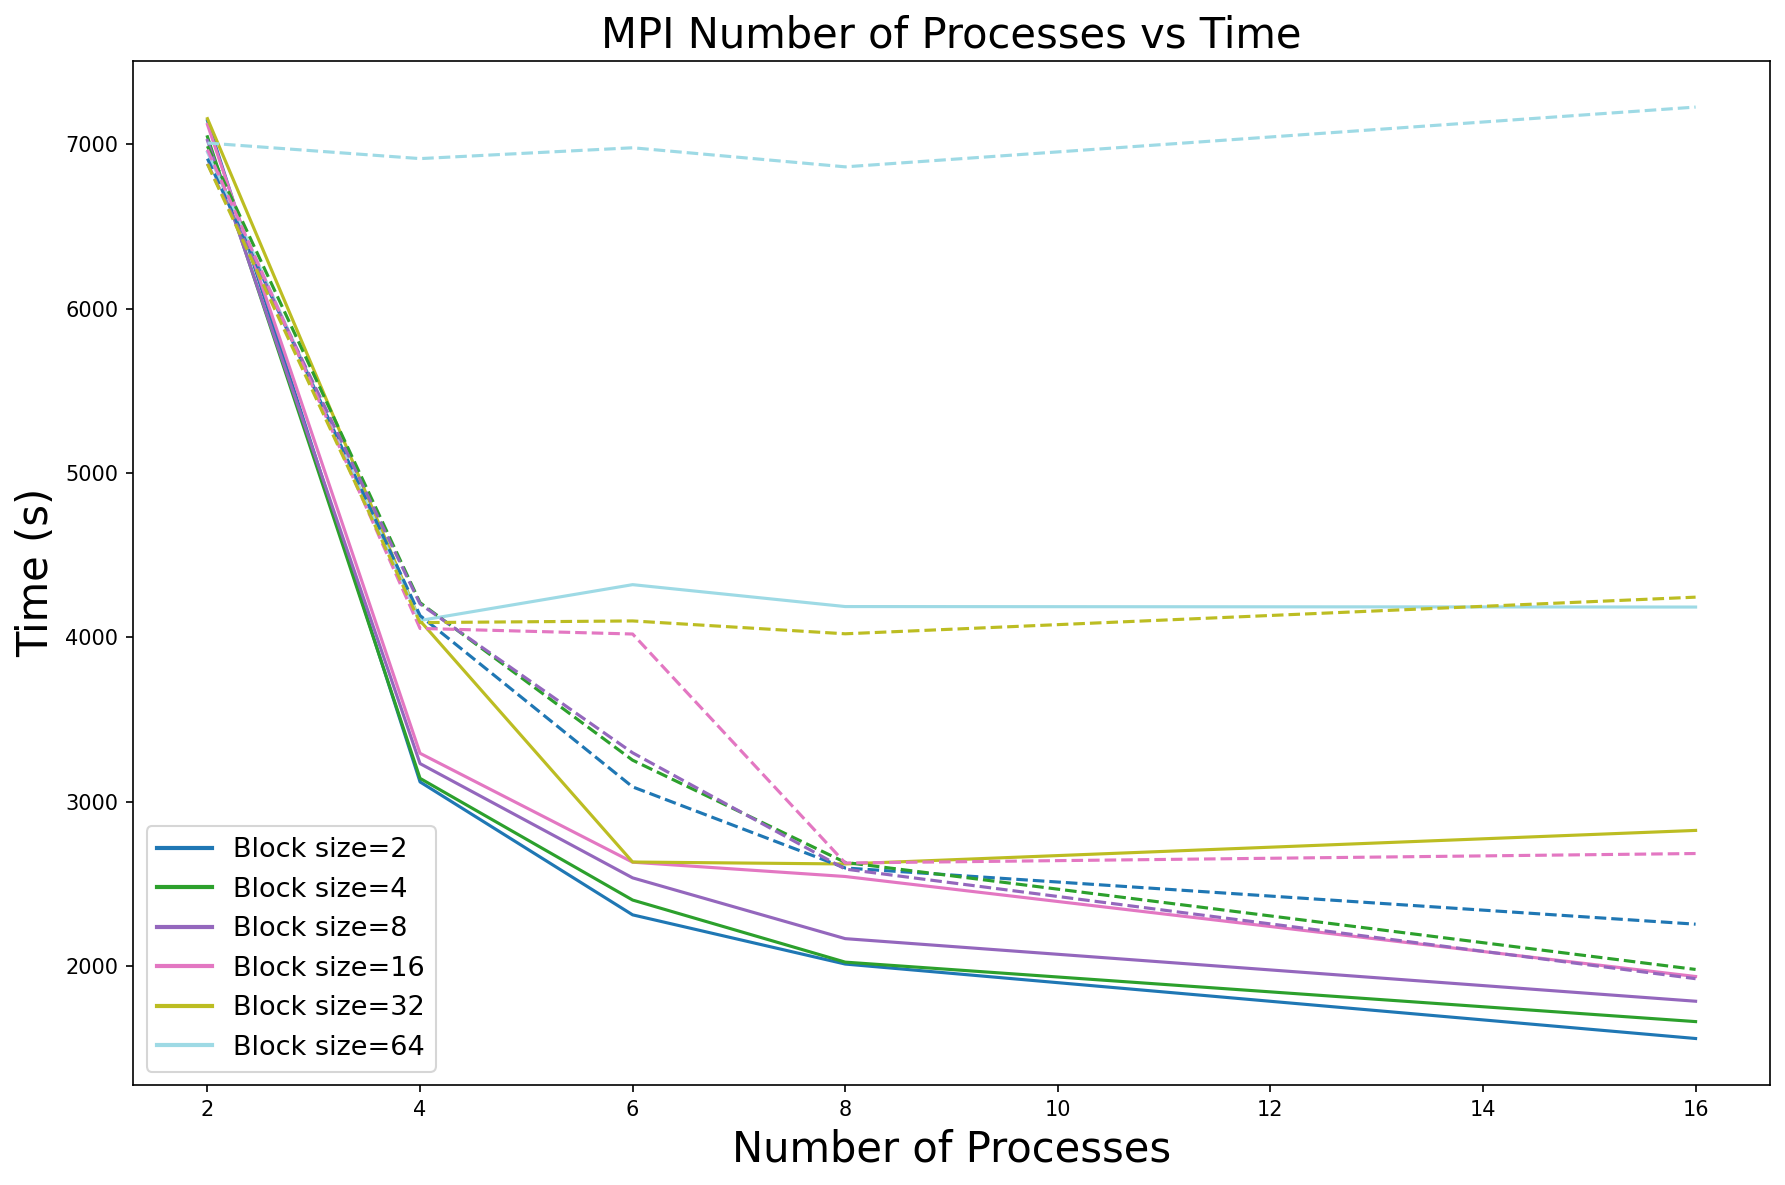

In [148]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming blockSizes and blockSizesrr are defined

fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

# Define the x-axis values for the number of processes
processes = [2, 4, 6, 8, 16]

# Define a color map for the block sizes using a more distinguishable colormap
colors = plt.cm.tab20(np.linspace(0, 1, len(blockSizes)))

# Plot the lines with different line styles but same color for the same block size
for i, (block_size, times) in enumerate(blockSizesrr.items()):
    ax.plot(processes, times, label=f'Block size={block_size}', color=colors[i], linestyle='solid')

for i, (block_size, times) in enumerate(blockSizes.items()):
    ax.plot(processes, times, color=colors[i], linestyle='dashed')

# Create a custom legend to show only the colors for different block sizes
handles = [plt.Line2D([0], [0], color=colors[i], lw=2) for i in range(len(blockSizes))]
labels = [f'Block size={block_size}' for block_size in blockSizes.keys()]
ax.legend(handles, labels, fontsize=13)

ax.set_xlabel('Number of Processes', fontsize=20)
ax.set_ylabel('Time (s)', fontsize=20)
ax.set_title('MPI Number of Processes vs Time', fontsize=20)

plt.tight_layout()
plt.show()

In [149]:
comp_times = blockSizes[2]
comp_timesrr = blockSizesrr[8]

In [150]:
comp_times

(6911.1, 4133.4, 3091.6, 2598.6, 2256.9)

In [151]:
sequential_time_comp = 6725

In [152]:
blockSizes[2][0]

6911.1

In [153]:
# calculate speedup, efficiency and scalability for all times, use blocksizesRR[2] as a reference for the scalability and sequential time for the sequential time
speedup = []
efficiency = []
scalability = []
speeduprr = []
efficiencyrr = []
scalabilityrr = []

for i in range(0, len(comp_times)):
    speedup.append(sequential_time_comp/comp_times[i])
    efficiency.append(speedup[i]/processes[i])
    scalability.append(comp_times[0]/comp_times[i])
    speeduprr.append(sequential_time_comp/comp_timesrr[i])
    efficiencyrr.append(speeduprr[i]/processes[i])
    scalabilityrr.append(comp_timesrr[0]/comp_timesrr[i])

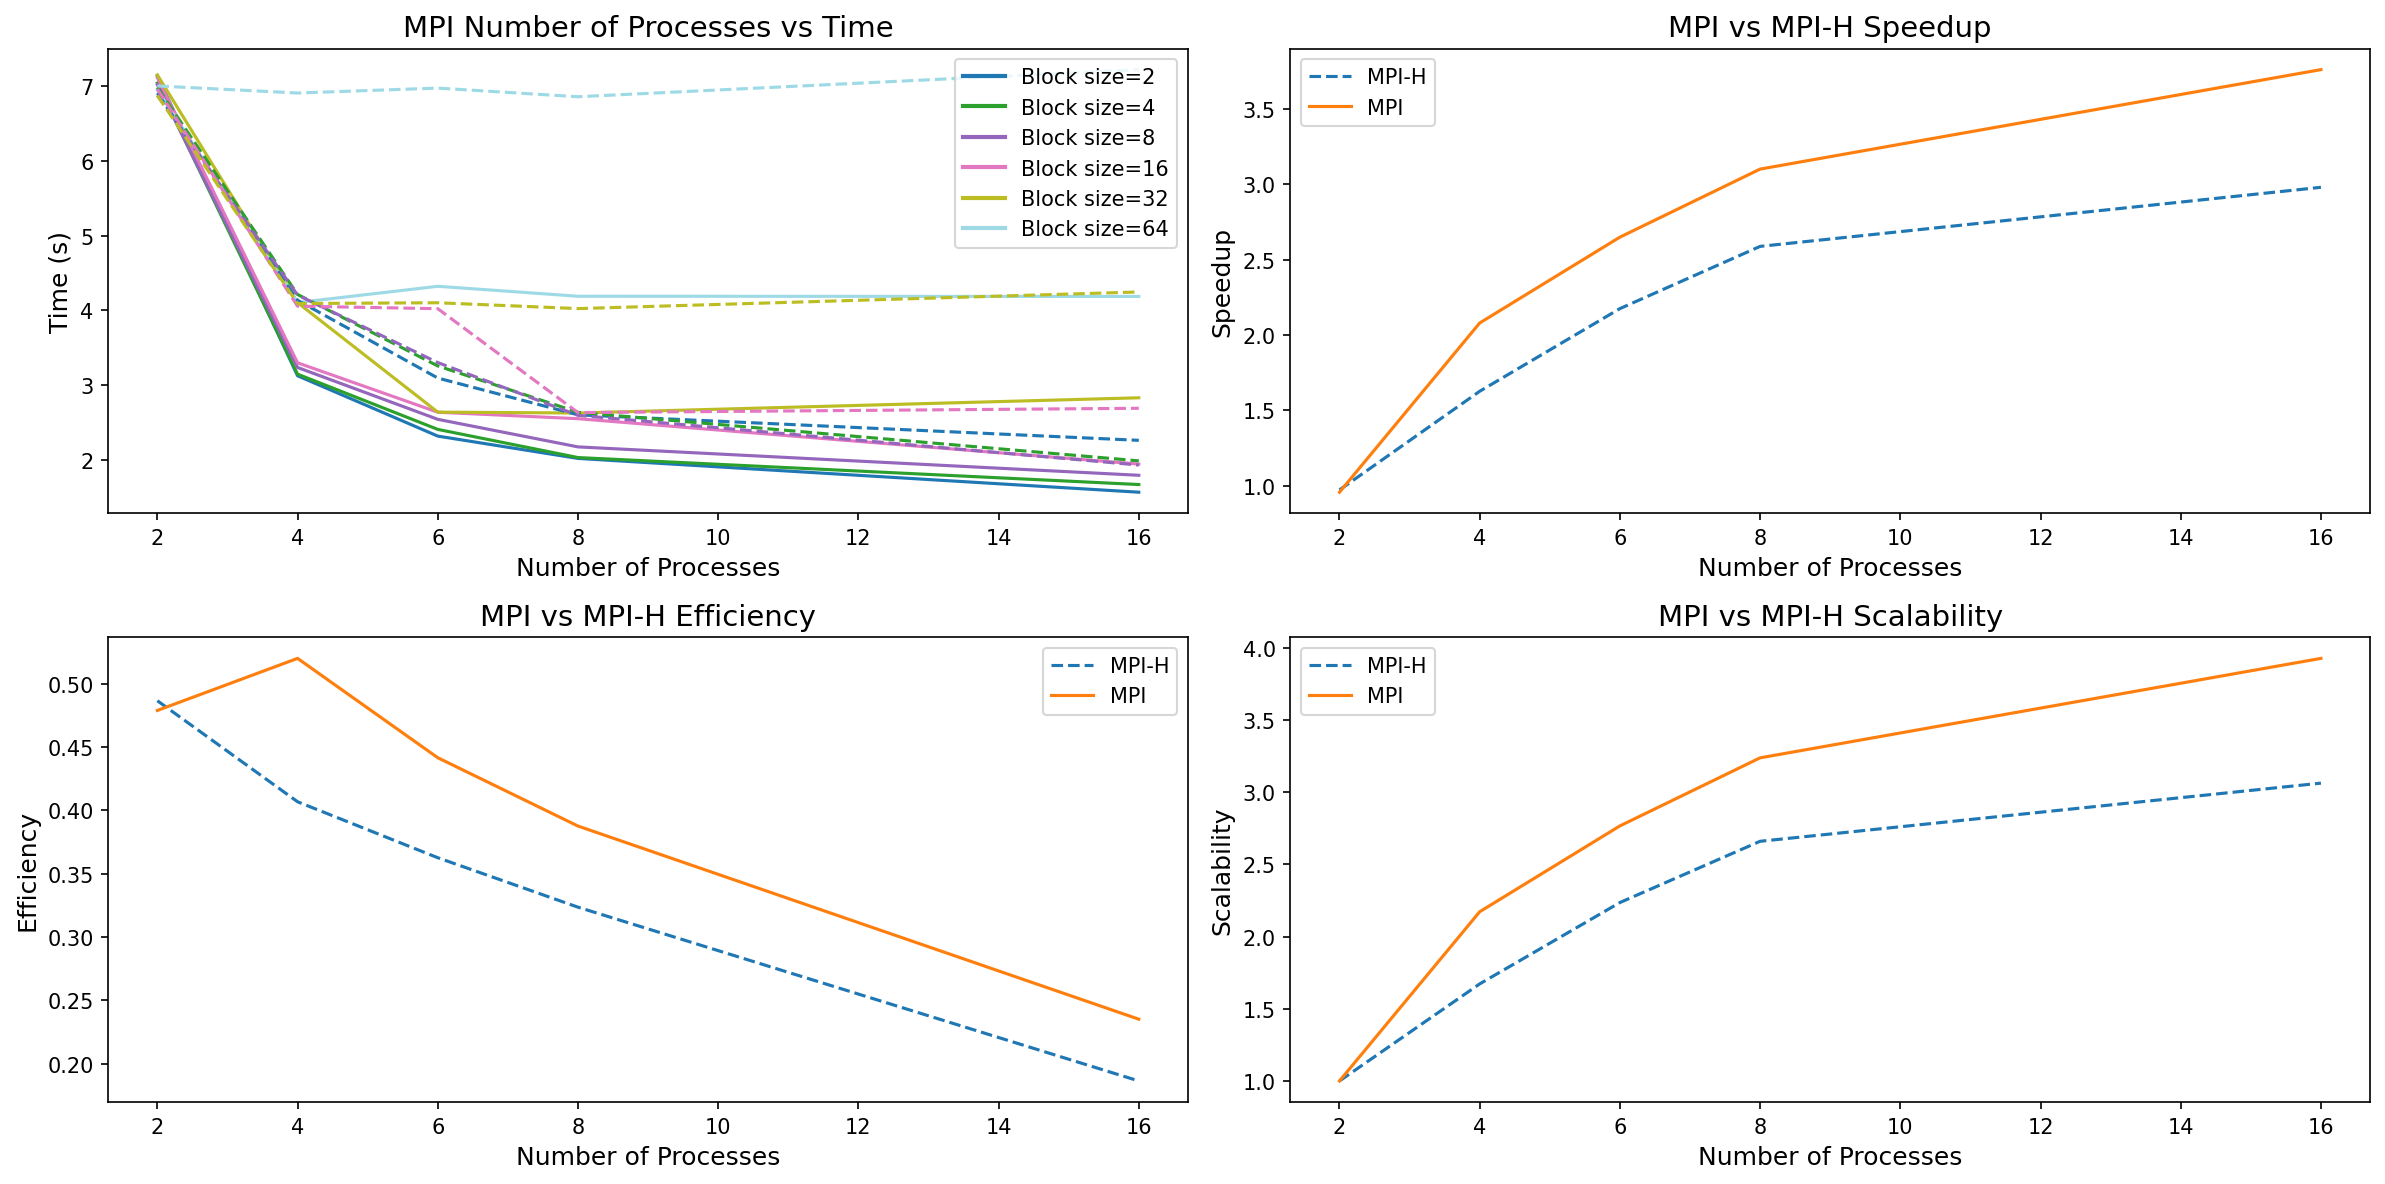

In [162]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming blockSizes, blockSizesrr, speedup, speeduprr, efficiency, efficiencyrr, scalability, and scalabilityrr are defined

fig, axs = plt.subplots(2, 2, figsize=(16, 8), dpi=150)

# Define the x-axis values for the number of processes
processes = [2, 4, 6, 8, 16]

# Define a color map for the block sizes using a more distinguishable colormap
colors = plt.cm.tab20(np.linspace(0, 1, len(blockSizes)))

# Plot the time plot
for i, (block_size, times) in enumerate(blockSizesrr.items()):
    times_in_seconds = [t / 1000 for t in times]  # Convert milliseconds to seconds
    axs[0, 0].plot(processes, times_in_seconds, label=f'Block size={block_size}', color=colors[i], linestyle='solid')

for i, (block_size, times) in enumerate(blockSizes.items()):
    times_in_seconds = [t / 1000 for t in times]  # Convert milliseconds to seconds
    axs[0, 0].plot(processes, times_in_seconds, color=colors[i], linestyle='dashed')

# Create a custom legend to show only the colors for different block sizes
handles = [plt.Line2D([0], [0], color=colors[i], lw=2) for i in range(len(blockSizes))]
labels = [f'Block size={block_size}' for block_size in blockSizes.keys()]
axs[0, 0].legend(handles, labels, fontsize=10)

axs[0, 0].set_xlabel('Number of Processes', fontsize=12)
axs[0, 0].set_ylabel('Time (s)', fontsize=12)
axs[0, 0].set_title('MPI Number of Processes vs Time', fontsize=14)

# Plot the speedup plot
axs[0, 1].plot(processes, speeduprr, label='MPI', linestyle='solid')
axs[0, 1].plot(processes, speedup, label='MPI-H', linestyle='dashed')

axs[0, 1].set_xlabel('Number of Processes', fontsize=12)
axs[0, 1].set_ylabel('Speedup', fontsize=12)
axs[0, 1].set_title('MPI vs MPI-H Speedup', fontsize=14)
axs[0, 1].legend()

# Plot the efficiency plot
axs[1, 0].plot(processes, efficiencyrr, label='MPI', linestyle='solid')
axs[1, 0].plot(processes, efficiency, label='MPI-H', linestyle='dashed')

axs[1, 0].set_xlabel('Number of Processes', fontsize=12)
axs[1, 0].set_ylabel('Efficiency', fontsize=12)
axs[1, 0].set_title('MPI vs MPI-H Efficiency', fontsize=14)
axs[1, 0].legend()

# Plot the scalability plot
axs[1, 1].plot(processes, scalabilityrr, label='MPI', linestyle='solid')
axs[1, 1].plot(processes, scalability, label='MPI-H', linestyle='dashed')

axs[1, 1].set_xlabel('Number of Processes', fontsize=12)
axs[1, 1].set_ylabel('Scalability', fontsize=12)
axs[1, 1].set_title('MPI vs MPI-H Scalability', fontsize=14)
axs[1, 1].legend()

plt.tight_layout()
plt.show()

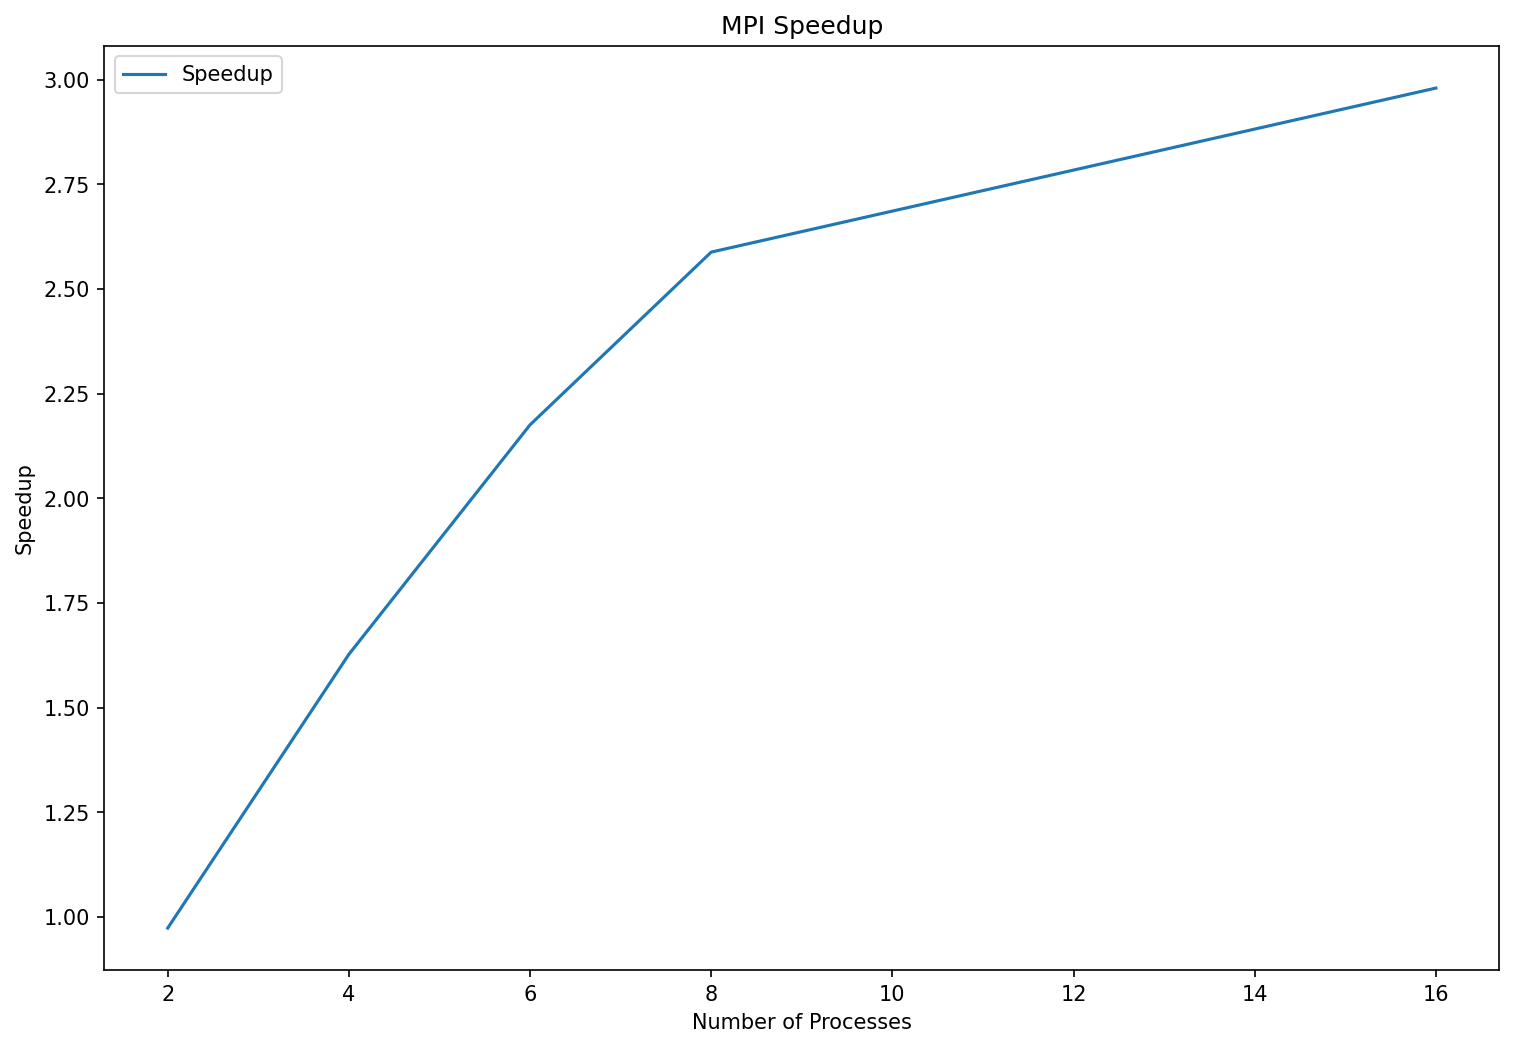

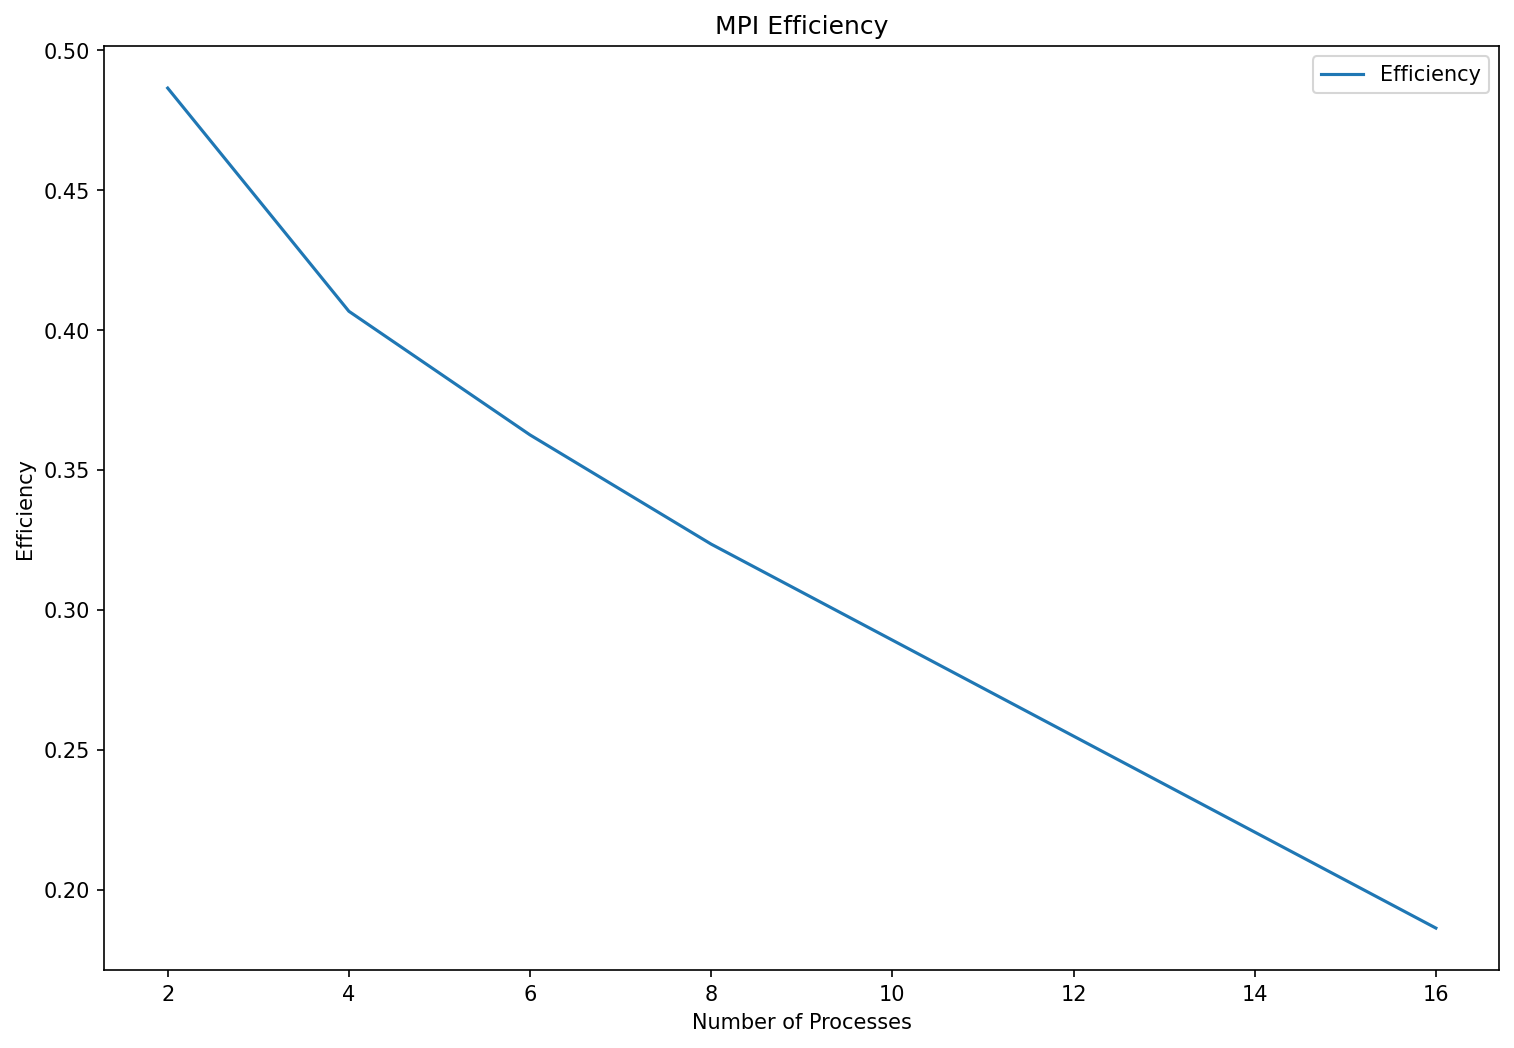

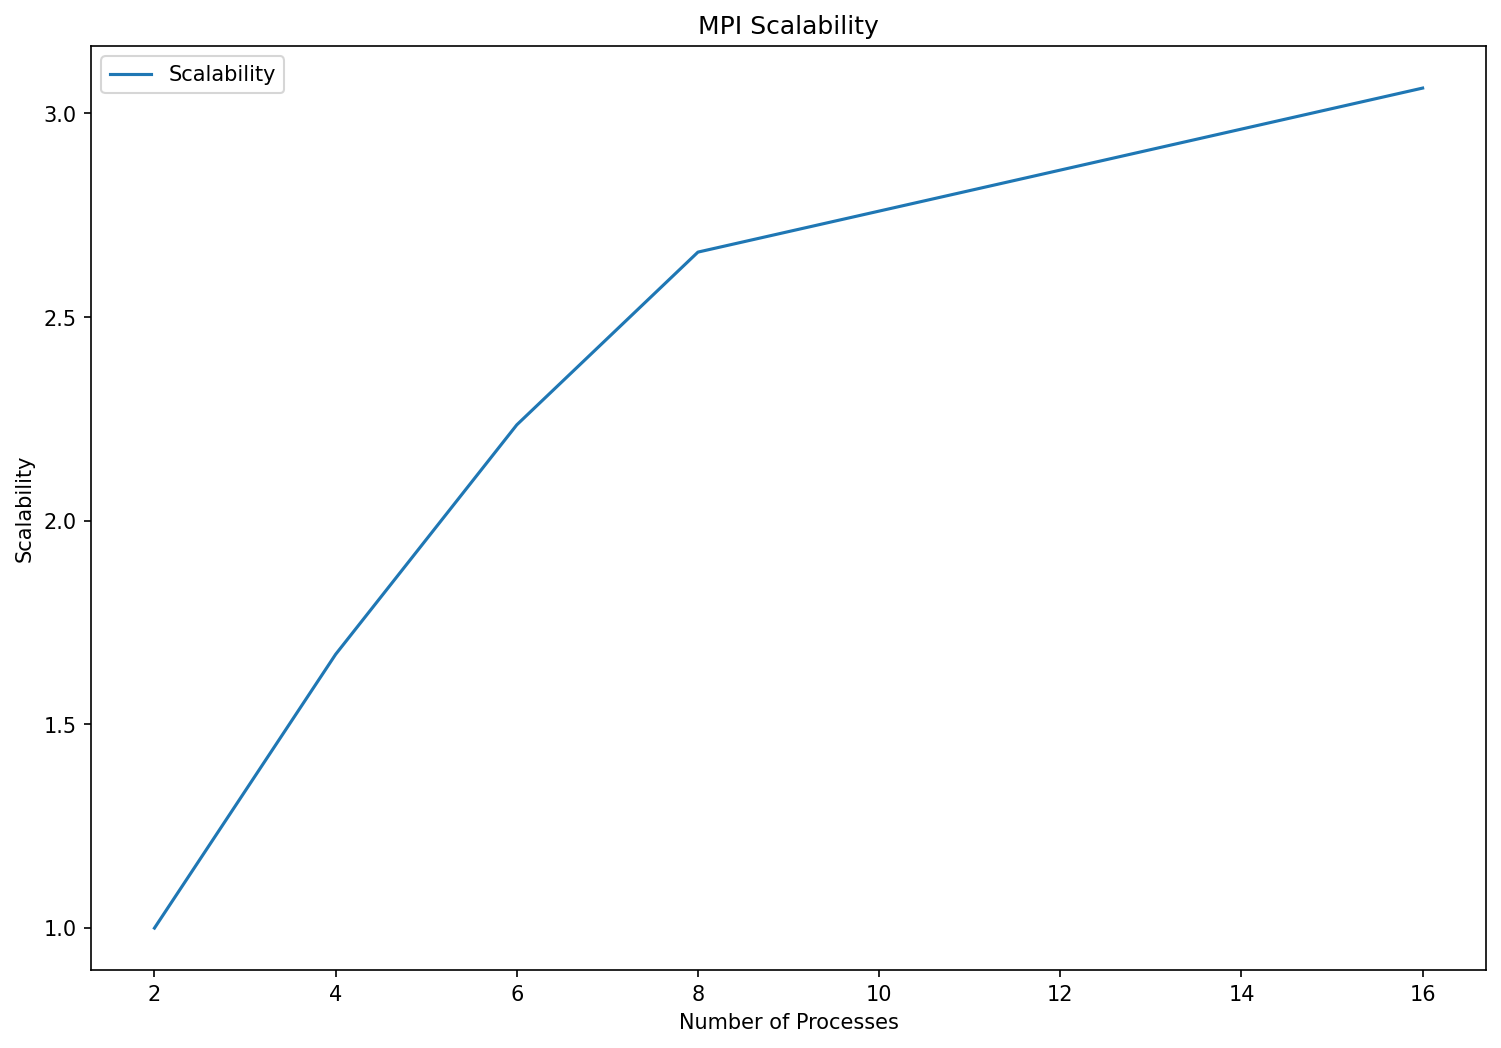

[0.9730723039747652, 1.6269898872598831, 2.175249061974382, 2.587931963364889, 2.9797509858655675]
[0.4865361519873826, 0.4067474718149708, 0.3625415103290637, 0.3234914954206111, 0.18623443661659797]
[1.0, 1.6720133546233127, 2.235444430068573, 2.6595474486261836, 3.0622092250432007]


In [154]:
#plot speedup, efficiency and scalability on three different plots
fig, ax = plt.subplots(figsize=(12, 8), dpi=150)


ax.plot(processes, speedup, label='Speedup')
ax.set_xlabel('Number of Processes')
ax.set_ylabel('Speedup')
ax.set_title('MPI Speedup')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

ax.plot(processes, efficiency, label='Efficiency')
ax.set_xlabel('Number of Processes')
ax.set_ylabel('Efficiency')
ax.set_title('MPI Efficiency')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(12, 8), dpi=150)

ax.plot(processes, scalability, label='Scalability')
ax.set_xlabel('Number of Processes')
ax.set_ylabel('Scalability')
ax.set_title('MPI Scalability')
ax.legend()
plt.show()

print(speedup)
print(efficiency)
print(scalability)
